|||
|---|---|
|Title|nwtimetracking|
|Author|numbworks|
|Version|5.0.2|
||Please check [docs/docs-nwtimetracking.md](../docs/docs-nwtimetracking.md) before proceeding.|

#### Global Modules

#### Local Modules

In [35]:
from nwtimetracking import SettingBag, ComponentBag, TimeTrackingProcessor, OPTION

#### Functions : Temp

#### Settings

In [36]:
setting_bag : SettingBag = SettingBag(
    options_tt = [OPTION.display],
    options_tts_by_month = [OPTION.display_c, OPTION.save, OPTION.logset],
    options_tts_by_year = [OPTION.display, OPTION.logset],
    options_tts_by_year_month = [OPTION.display, OPTION.logset],
    options_tts_by_year_month_spnv = [OPTION.display, OPTION.logset],
    options_tts_by_year_spnv = [],
    options_tts_by_spn = [OPTION.display, OPTION.logset],
    options_tts_by_spn_spv = [],
    options_tts_by_hashtag = [OPTION.display],
    options_tts_by_hashtag_year = [OPTION.display, OPTION.logset],
    options_tts_by_efs = [OPTION.display],
    options_tts_by_tr = [OPTION.display],
    options_tts_gantt_spnv = [OPTION.display, OPTION.plot, OPTION.logterm, OPTION.logset],
    options_tts_gantt_hseq = [OPTION.display, OPTION.plot, OPTION.logterm, OPTION.logset],
    options_definitions = [],
    excel_nrows = 1609,
    tts_by_year_month_display_only_years = [2024, 2025],
    tts_by_year_month_spnv_display_only_spn = "nwrefurbishedanalytics",
    tts_by_year_spnv_display_only_spn = "nwrefurbishedanalytics",
    tts_by_spn_spv_display_only_spn = "nwrefurbishedanalytics",
    tts_gantt_spnv_months = 3,
    tts_gantt_spnv_min_duration = 1,
    tts_gantt_hseq_months = 2,
    tts_gantt_hseq_min_duration = 1
)

#### Main : Analysis

In [37]:
tt_processor : TimeTrackingProcessor = TimeTrackingProcessor(component_bag = ComponentBag(), setting_bag = setting_bag)
tt_processor.initialize()
tt_processor.process_tt()

Date,StartTime,EndTime,Effort,Hashtag,Descriptor,IsSoftwareProject,IsReleaseDay,Year,Month
2025-07-13,11:30,13:30,2h 00m,#python,nwrefurbishedanalytics v1.0.0,True,False,2025,7
2025-07-13,14:00,16:15,2h 15m,#python,nwrefurbishedanalytics v1.0.0,True,False,2025,7
2025-07-13,16:45,21:15,4h 30m,#python,nwrefurbishedanalytics v1.0.0,True,False,2025,7
2025-07-13,22:00,22:30,0h 30m,#python,nwrefurbishedanalytics v1.0.0,True,False,2025,7
2025-07-13,23:00,23:30,0h 30m,#python,nwrefurbishedanalytics v1.0.0,True,False,2025,7


In [38]:
tt_processor.process_tts_by_month()

Month,2015,↕,2016,↕,2017,↕,2018
1,00h 00m,↑,18h 00m,↑,88h 30m,↓,80h 15m
2,00h 00m,↑,45h 30m,↑,65h 30m,↑,90h 45m
3,00h 00m,↑,20h 45m,↑,71h 45m,↑,89h 00m
4,00h 00m,↑,37h 30m,↑,68h 00m,↑,88h 30m
5,00h 00m,↑,53h 00m,↑,83h 00m,↑,91h 15m
6,00h 00m,↑,57h 45m,↓,37h 45m,↑,62h 00m
7,00h 00m,↑,46h 45m,↑,65h 30m,↑,69h 30m
8,00h 00m,↑,25h 45m,↑,45h 45m,↑,72h 00m
9,00h 00m,↑,89h 30m,↓,43h 45m,↑,64h 00m
10,08h 00m,↑,82h 15m,↓,64h 30m,↓,46h 45m


Month,2018,↕,2019,↕,2020,↕,2021
1,80h 15m,↓,60h 00m,↓,29h 15m,↑,53h 00m
2,90h 45m,↓,73h 00m,↓,38h 00m,↓,31h 30m
3,89h 00m,↓,75h 30m,↓,35h 00m,↑,40h 30m
4,88h 30m,↓,59h 45m,↓,40h 45m,↓,19h 00m
5,91h 15m,↓,54h 45m,↓,14h 30m,↑,112h 45m
6,62h 00m,↓,29h 15m,↓,12h 00m,↑,54h 00m
7,69h 30m,↓,24h 15m,↑,34h 00m,↓,23h 30m
8,72h 00m,↓,06h 00m,↑,32h 00m,↑,110h 00m
9,64h 00m,↓,39h 00m,↑,44h 00m,↓,43h 30m
10,46h 45m,↓,45h 30m,↑,48h 00m,↓,35h 30m


Month,2021,↕,2022,↕,2023,↕,2024
1,53h 00m,↓,00h 00m,↑,06h 00m,↑,45h 45m
2,31h 30m,↓,03h 00m,↑,24h 00m,↑,77h 45m
3,40h 30m,↓,06h 15m,↑,50h 15m,↑,77h 45m
4,19h 00m,↑,27h 30m,↓,19h 00m,↑,29h 30m
5,112h 45m,↓,49h 45m,↓,31h 00m,↑,43h 00m
6,54h 00m,↑,73h 30m,↓,24h 45m,↑,48h 00m
7,23h 30m,↑,51h 00m,↓,16h 30m,↑,67h 00m
8,110h 00m,↓,36h 30m,↑,41h 30m,↓,32h 45m
9,43h 30m,↑,69h 00m,↓,50h 15m,↓,48h 00m
10,35h 30m,↑,38h 30m,↓,20h 00m,↑,101h 30m


Month,2024,↕,2025
1,45h 45m,↑,79h 00m
2,77h 45m,↓,74h 00m
3,77h 45m,↓,38h 15m
4,29h 30m,↑,103h 00m
5,43h 00m,↑,107h 45m
6,48h 00m,↑,104h 15m
7,67h 00m,↑,70h 30m
8,32h 45m,,
9,48h 00m,,
10,101h 30m,,


Relevant Settings: {"tts_by_month_effort_highlight": true, "tts_by_month_effort_highlight_mode": "top_three_efforts"}
This content (id: 'tts_by_month') has been successfully saved as '/home/nwtimetracking/TIMETRACKINGBYMONTH.md'.


In [39]:
tt_processor.process_tts_by_year()

Year,Effort,YearlyTarget,TargetDiff,IsTargetMet
2015,18h 00m,00h 00m,+18h 00m,True
2016,615h 15m,500h 00m,+115h 15m,True
2017,762h 45m,500h 00m,+262h 45m,True
2018,829h 45m,500h 00m,+329h 45m,True
2019,515h 15m,500h 00m,+15h 15m,True
2020,470h 30m,500h 00m,-30h 30m,False
2021,537h 30m,500h 00m,+37h 30m,True
2022,467h 30m,400h 00m,+67h 30m,True
2023,320h 15m,250h 00m,+70h 15m,True
2024,862h 30m,500h 00m,+362h 30m,True


Relevant Settings: {"tts_by_year_effort_highlight": true, "tts_by_year_effort_highlight_mode": "top_three_efforts"}


In [40]:
tt_processor.process_tts_by_year_month()

Year,Month,Effort,YearlyTotal,ToTarget
2024,1,45h 45m,45h 45m,-455h 45m
2024,2,77h 45m,123h 30m,-377h 30m
2024,3,77h 45m,201h 15m,-299h 15m
2024,4,29h 30m,230h 45m,-270h 45m
2024,5,43h 00m,273h 45m,-227h 45m
2024,6,48h 00m,321h 45m,-179h 45m
2024,7,67h 00m,388h 45m,-112h 45m
2024,8,32h 45m,421h 30m,-79h 30m
2024,9,48h 00m,469h 30m,-31h 30m
2024,10,101h 30m,571h 00m,+71h 00m


Relevant Settings: {"tts_by_year_month_effort_highlight": true, "tts_by_year_month_effort_highlight_mode": "top_three_efforts"}


In [41]:
tt_processor.process_tts_by_year_month_spnv()

Year,Month,ProjectName,ProjectVersion,Effort,DME,%_DME,TME,%_TME
2025,6,nwrefurbishedanalytics,1.0.0,64h 00m,76h 00m,84.21,104h 15m,61.39
2025,7,nwrefurbishedanalytics,1.0.0,64h 00m,64h 00m,100.00,70h 30m,90.78


Relevant Settings: {"tts_by_year_month_spnv_effort_highlight": true, "tts_by_year_month_spnv_effort_highlight_mode": "top_three_efforts"}


In [42]:
tt_processor.process_tts_by_year_spnv()

In [43]:
tt_processor.process_tts_by_spn()

Hashtag,ProjectName,Effort,DE,%_DE,TE,%_TE
#python,nwtraderaanalytics,263h 15m,2456h 15m,10.72,3427h 15m,7.68
#python,nwtimetracking,226h 15m,2456h 15m,9.21,3427h 15m,6.60
#python,nwreadinglist,159h 15m,2456h 15m,6.48,3427h 15m,4.65
#python,nwrefurbishedanalytics,128h 00m,2456h 15m,5.21,3427h 15m,3.73
#python,nwpackageversions,56h 00m,2456h 15m,2.28,3427h 15m,1.63
#python,nwshared,47h 15m,2456h 15m,1.92,3427h 15m,1.38
#python,nwbuild,25h 45m,2456h 15m,1.05,3427h 15m,0.75
#duckdb,nwapolloanalytics,192h 00m,2456h 15m,7.82,3427h 15m,5.60
#csharp,NW.UnivariateForecasting,208h 00m,2456h 15m,8.47,3427h 15m,6.07
#csharp,NW.NGramTextClassification,207h 30m,2456h 15m,8.45,3427h 15m,6.05


Relevant Settings: {"tts_by_spn_effort_highlight": true, "tts_by_spn_effort_highlight_mode": "top_three_efforts"}


In [44]:
tt_processor.process_tts_by_spn_spv()

In [45]:
tt_processor.process_tts_by_hashtag()

Hashtag,Effort,Effort%
#untagged,2548h 45m,42.65
#csharp,1111h 30m,18.60
#python,983h 30m,16.46
#studying,477h 30m,7.99
#maintenance,448h 00m,7.50
#duckdb,192h 00m,3.21
#powershell,154h 00m,2.58
#overtime,36h 30m,0.61
#asciidoc,24h 15m,0.41


In [46]:
tt_processor.process_tts_by_hashtag_year()

Hashtag,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
#asciidoc,,,,,,,,,,,24h 15m
#csharp,,,,,61h 45m,206h 30m,441h 45m,298h 45m,67h 30m,35h 15m,
#duckdb,,,,,,,,,,,192h 00m
#maintenance,,,,,53h 45m,53h 30m,29h 30m,36h 30m,52h 30m,117h 00m,105h 15m
#overtime,,,,,01h 00m,19h 00m,,,14h 30m,02h 00m,
#powershell,,,,,,116h 45m,11h 30m,21h 15m,04h 30m,,
#python,,,,,,,,72h 00m,126h 30m,577h 45m,207h 15m
#studying,,,,,75h 45m,74h 45m,54h 45m,39h 00m,54h 45m,130h 30m,48h 00m
#untagged,18h 00m,615h 15m,762h 45m,829h 45m,323h 00m,,,,,,


Relevant Settings: {"tts_by_hashtag_year_effort_highlight": true, "tts_by_hashtag_year_effort_highlight_mode": "top_one_effort_per_row"}


In [47]:
tt_processor.process_tts_by_efs()

StartTime,EndTime,Effort,ES_IsCorrect,ES_Expected,ES_Message


In [48]:
tt_processor.process_tts_by_tr()

TimeRangeId,Occurrences
08:00-08:45,50
08:00-08:30,37
18:00-20:00,22
17:15-17:45,21
17:30-18:00,21
19:00-20:00,19
17:00-17:30,19
17:00-17:45,15
21:00-22:00,14
17:00-20:00,13


Descriptor,StartDate,EndDate,EffortH,Duration
HackberryPi configuration.,2025-05-14,2025-05-17,4,3
nwbuild v1.0.0,2025-05-12,2025-05-26,26,14
nwcommitaverages v1.0.0,2025-05-19,2025-05-20,10,1
nwdocstringchecking v1.0.0,2025-05-18,2025-05-19,6,1
nwreadinglist v4.3.0,2025-05-08,2025-05-11,6,3
nwrefurbishedanalytics v1.0.0,2025-06-03,2025-07-13,128,40
nwtraderaanalytics v4.5.1,2025-05-13,2025-05-18,8,5


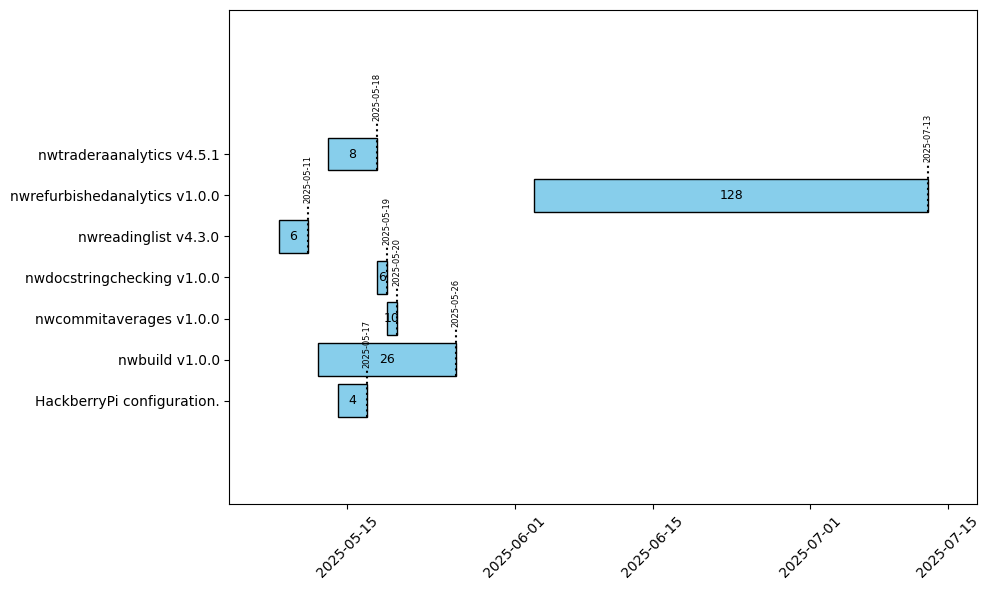

tts_gantt_spnv: Shows how much subsequent work has been performed per software project name/version.
Relevant Settings: {"tts_gantt_spnv_months": 3, "tts_gantt_spnv_min_duration": 1}


In [49]:
tt_processor.process_tts_gantt_spnv()

HashtagSeq,StartDate,EndDate,EffortH,Duration
#duckdb12,2025-05-31,2025-06-02,19,2
#maintenance109,2025-06-07,2025-06-08,13,1
#python48,2025-05-18,2025-05-20,17,2
#python49,2025-05-25,2025-05-27,27,2
#python51,2025-06-10,2025-06-11,12,1
#python52,2025-06-21,2025-06-23,22,2
#python54,2025-06-28,2025-07-03,28,5
#python55,2025-07-05,2025-07-08,31,3
#python56,2025-07-10,2025-07-11,4,1
#python57,2025-07-12,2025-07-13,17,1


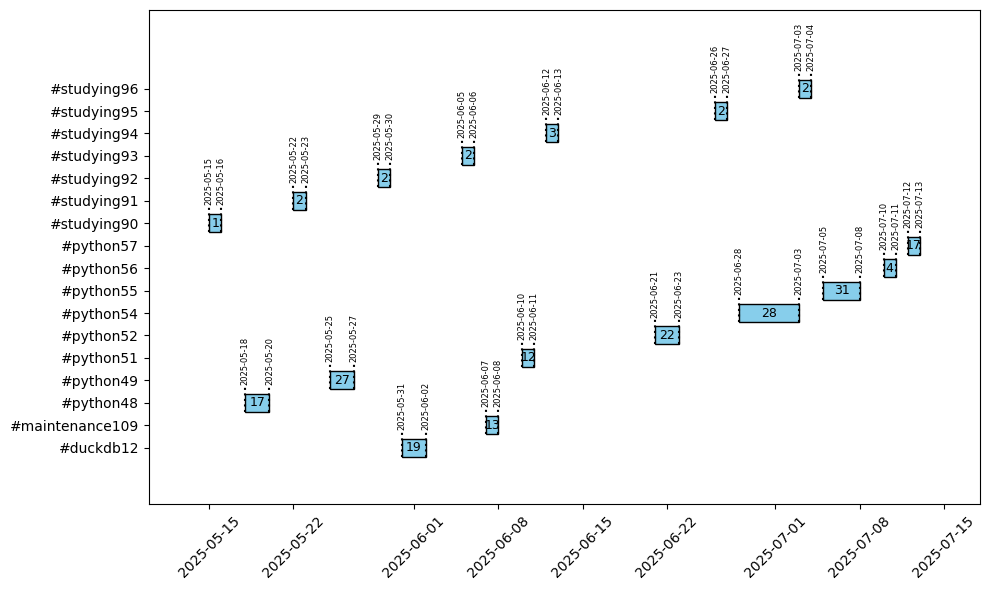

tts_gantt_hseq: Shows how much subsequent work has been performed per hashtag.
Relevant Settings: {"tts_gantt_hseq_months": 2, "tts_gantt_hseq_min_duration": 1}


In [50]:
tt_processor.process_tts_gantt_hseq()

In [51]:
tt_processor.process_definitions()